# Chicago Crime Visualization & Analysis

### Pujan Malavia

In [ ]:
# !pip install pillow

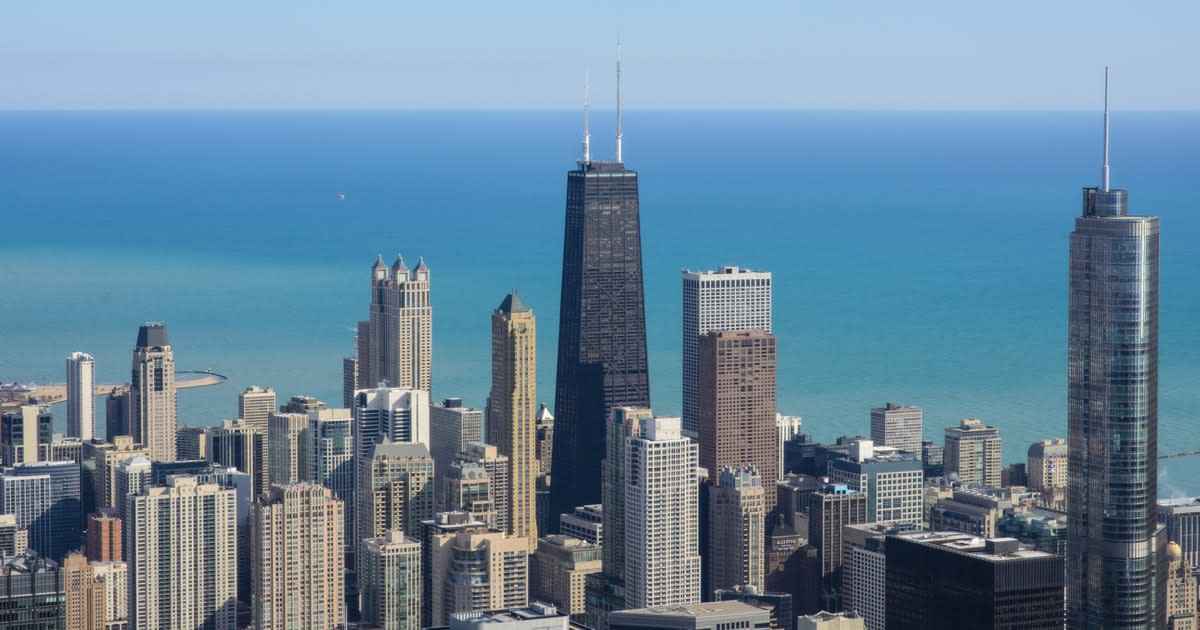

In [421]:
from IPython.display import display
from PIL import Image
path="C:/Users/puj83/OneDrive/Portfolio/Crime/chicagocity.jpg"
display(Image.open(path))

### Link(s) to Datasets:
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/

https://data.cityofchicago.org/Health-Human-Services/below-poverty-level-by-community/b7zw-zvm2

### Data Context:
This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. Should you have questions about this dataset, you may contact the Research & Development Division of the Chicago Police Department at PSITAdministration@ChicagoPolice.org. Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information and the information should not be used for comparison purposes over time. The Chicago Police Department will not be responsible for any error or omission, or for the use of, or the results obtained from the use of this information. All data visualizations on maps should be considered approximate and attempts to derive specific addresses are strictly prohibited. The Chicago Police Department is not responsible for the content of any off-site pages that are referenced by or that reference this web page other than an official City of Chicago or Chicago Police Department web page. The user specifically acknowledges that the Chicago Police Department is not responsible for any defamatory, offensive, misleading, or illegal conduct of other users, links, or third parties and that the risk of injury from the foregoing rests entirely with the user. The unauthorized use of the words "Chicago Police Department," "Chicago Police," or any colorable imitation of these words or the unauthorized use of the Chicago Police Department logo is unlawful. This web page does not, in any way, authorize such use. Data are updated daily. To access a list of Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) codes, go to http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e

### Abstract:
Every day, there are a numerous amount of crimes that occur across the country and the world. This can include major metropolitan areas with high populations and business activity. In this analysis, we look at the city of Chicago. What makes a Chicago dangerous? What types of crimes occur in within Chicago, primarily at the zip level? Which zips/areas have the highest concentration of crimes? What is the level of 'seriousness' for these crimes? Which zips/areas have the highest concentration of serious crimes? And after find that out, what days/times do they occur? All of these questions are looked at in the analysis below.

### Industry:

Government Administration

### Tool:
Python (Jupyter Notebook)

### Data Field Descriptions:

unique_key: Unique identifier for the record.

case_number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

Date: when the incident occurred. this is sometimes a best estimate.

Block: The partially redacted address where the incident occurred, placing it on the same block as the actual address.

Iucr: The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of 
IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

primary_type: The primary description of the IUCR code.

Description: The secondary description of the IUCR code, a subcategory of the primary description.

location_description: Description of the location where the incident occurred.

Arrest: Indicates whether an arrest was made.

Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

District: Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

Ward: The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

community_area: Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

fbi_code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

x_coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

y_coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Year: Year the incident occurred.
updated_on: Date and time the record was last updated.

Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

In [ ]:
# !pip install
# !pip install fbprophet
# !conda install pandas=0.25.3

### Import Libraries

In [426]:
import numpy as np 
import re
import pandas as pd 
import seaborn as sns
from datetime import datetime
import time
from time import sleep
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltd
%matplotlib inline
plt.style.use('seaborn')
# import fbprophet
# print(fbprophet.__version__)
# from geopy.geocoders import Nominatim
from sklearn.cluster import AgglomerativeClustering as AC

### Import Dataset(s)

In [427]:
# importing crime dataset
crimes = pd.read_csv('C:/Users/puj83/OneDrive/CV/Cases/Country Financial/Crimes.csv',error_bad_lines=False)
# importing zips dataset
zips = pd.read_csv('C:/Users/puj83/OneDrive/CV/Cases/Country Financial/zip.csv',error_bad_lines=False)

C:\Users\puj83\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [428]:
print(crimes.shape)

(1048575, 22)


In [429]:
crimes.dropna()
crimes = crimes[(crimes['Year'] >= 2011) & (crimes['Year'] <= 2017)]

In [430]:
# Joining zip data to crime dataset

decimals = 1    
crimes['Latitude'] = crimes['Latitude'].apply(lambda x: round(x, decimals))
crimes['Longitude'] = crimes['Longitude'].apply(lambda x: round(x, decimals))
zips['Latitude'] = zips['Latitude'].apply(lambda x: round(x, decimals))
zips['Longitude'] = zips['Longitude'].apply(lambda x: round(x, decimals))

print(crimes['Latitude'])
print(crimes['Longitude'])
print(zips['Latitude'])
print(zips['Longitude'])

crimes1 = pd.merge(crimes, zips,  how='left', left_on = ['Latitude','Longitude'], right_on = ['Latitude', 'Longitude'])

11         36.6
12         36.6
13         36.6
14         36.6
16         36.6
           ... 
1048562     NaN
1048563     NaN
1048566     NaN
1048572     NaN
1048574     NaN
Name: Latitude, Length: 729641, dtype: float64
11        -91.7
12        -91.7
13        -91.7
14        -91.7
16        -91.7
           ... 
1048562     NaN
1048563     NaN
1048566     NaN
1048572     NaN
1048574     NaN
Name: Longitude, Length: 729641, dtype: float64
0        34.4
1        35.6
2        43.7
3        43.0
4        41.2
         ... 
43186    40.4
43187    41.1
43188    40.7
43189    45.0
43190    39.0
Name: Latitude, Length: 43191, dtype: float64
0       -94.4
1       -92.2
2       -94.7
3       -85.9
4       -92.0
         ... 
43186   -79.9
43187   -91.5
43188   -78.1
43189   -93.5
43190   -76.6
Name: Longitude, Length: 43191, dtype: float64


In [431]:
# crimes = crimes1
print(crimes1['Zip'].unique())
decimals = 0    
crimes1['Zip'] = crimes1['Zip'].apply(lambda x: round(x, decimals))

[65688. 65692. 60473. 60476. 60419. 60827. 60438. 46327. 46324. 46312.
 60409. 46323. 46320. 46394. 60633. 60628. 60619. 60617. 60805. 60803.
 60655. 60406. 60620. 60652. 60643. 60456. 60615. 60653. 60621. 60649.
 60637. 60697. 60667. 60694. 60684. 60668. 60691. 60699. 60499. 60683.
 60009. 60161. 60663. 60609. 60094. 60159. 60412. 60095. 60673. 60679.
 60636. 60677. 60685. 60664. 60675. 60687. 60669. 60665. 60672. 60701.
 60303. 60632. 60670. 60065. 60674. 60650. 60680. 60690. 60026. 60168.
 60006. 60678. 60671. 60681. 60204. 60454. 60629. 60078.    nan 60534.
 60501. 60546. 60513. 60804. 60402. 60458. 60638. 60651. 60647. 60623.
 60657. 60608. 60614. 60612. 60607. 60622. 60624. 60692. 60654. 60616.
 60606. 60603. 60601. 60604. 60602. 60661. 60610. 60611. 60605. 60153.
 60304. 60644. 60330. 60155. 60707. 60305. 60171. 60141. 60302. 60301.
 60634. 60130. 60639. 60076. 60203. 60660. 60618. 60659. 60613. 60209.
 60645. 60625. 60202. 60712. 60640. 60626. 60646. 60706. 60641. 60714.
 60630

In [432]:
count_nan = len(crimes1) - crimes1.count()
count_nan

ID                                0
Case Number                       1
Date                              0
Block                             0
IUCR                              0
Primary Type                      0
Description                       0
Location Description          20671
Arrest                            0
Domestic                          0
Beat                              0
District                          0
Ward                             94
Community Area                   14
FBI Code                          0
X Coordinate                  16194
Y Coordinate                  16194
Year                              0
Updated On                        0
Latitude                      16194
Longitude                     16194
Location                      16194
Zip                           18221
City                          18221
State                         18221
Timezone                      18221
Daylight savings time flag    18221
geopoint                    

### Data Exploration/Data Wrangling/Data Visualization

In [433]:
crimes = crimes1
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [434]:
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Zip', 'City', 'State', 'Timezone',
       'Daylight savings time flag', 'geopoint'],
      dtype='object')

In [435]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729641 entries, 0 to 10117687
Data columns (total 28 columns):
ID                            729641 non-null int64
Case Number                   729640 non-null object
Date                          729641 non-null object
Block                         729641 non-null object
IUCR                          729641 non-null object
Primary Type                  729641 non-null object
Description                   729641 non-null object
Location Description          726341 non-null object
Arrest                        729641 non-null bool
Domestic                      729641 non-null bool
Beat                          729641 non-null int64
District                      729641 non-null int64
Ward                          729628 non-null float64
Community Area                729627 non-null float64
FBI Code                      729641 non-null object
X Coordinate                  713447 non-null float64
Y Coordinate                  713447 non-nu

In [436]:
# Crimes types in the data

print(crimes['Primary Type'].unique())
print(crimes['Description'].unique())
print(crimes['Location Description'].unique())
print(crimes['Year'].unique())

['THEFT' 'CRIMINAL TRESPASS' 'ASSAULT' 'NARCOTICS' 'BURGLARY'
 'OTHER OFFENSE' 'CRIMINAL DAMAGE' 'MOTOR VEHICLE THEFT' 'BATTERY'
 'DECEPTIVE PRACTICE' 'ROBBERY' 'WEAPONS VIOLATION' 'CRIM SEXUAL ASSAULT'
 'ARSON' 'PUBLIC PEACE VIOLATION' 'OFFENSE INVOLVING CHILDREN'
 'SEX OFFENSE' 'INTERFERENCE WITH PUBLIC OFFICER' 'LIQUOR LAW VIOLATION'
 'INTIMIDATION' 'HOMICIDE' 'STALKING' 'OBSCENITY' 'KIDNAPPING'
 'CRIMINAL SEXUAL ASSAULT' 'PROSTITUTION'
 'CONCEALED CARRY LICENSE VIOLATION' 'GAMBLING'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'PUBLIC INDECENCY' 'OTHER NARCOTIC VIOLATION' 'NON - CRIMINAL']
['$500 AND UNDER' 'OVER $500' 'TO STATE SUP LAND' 'SIMPLE'
 'POSS: CANNABIS 30GMS OR LESS' 'FORCIBLE ENTRY' 'FROM BUILDING'
 'TO RESIDENCE' 'OTHER CRIME INVOLVING PROPERTY' 'TO PROPERTY'
 'THEFT/RECOVERY: AUTOMOBILE' 'UNLAWFUL ENTRY' 'HARASSMENT BY TELEPHONE'
 'COUNTERFEITING DOCUMENT' 'ARMED: HANDGUN' 'FRAUD OR CONFIDENCE GAME'
 'VEHICLE TITLE/REG OFFENSE' 'FINANCIAL I

In [437]:
datagb_crime=crimes.groupby("Primary Type")["Primary Type"].count()
datagb_crime.sort_values(ascending=False, inplace=True)
datagb_crime.head(50)

Primary Type
THEFT                                166789
BATTERY                              134916
CRIMINAL DAMAGE                       80821
DECEPTIVE PRACTICE                    52955
ASSAULT                               50378
OTHER OFFENSE                         46981
NARCOTICS                             42837
BURGLARY                              36882
ROBBERY                               30351
MOTOR VEHICLE THEFT                   29382
CRIMINAL TRESPASS                     17454
WEAPONS VIOLATION                     10397
OFFENSE INVOLVING CHILDREN             6852
PUBLIC PEACE VIOLATION                 4932
CRIM SEXUAL ASSAULT                    4490
SEX OFFENSE                            3055
INTERFERENCE WITH PUBLIC OFFICER       2935
PROSTITUTION                           2420
ARSON                                  1318
GAMBLING                                674
LIQUOR LAW VIOLATION                    643
KIDNAPPING                              522
STALKING           

In [438]:
crime_list=datagb_crime.index.values[0:25].tolist()
crimes=crimes[crimes["Primary Type"].isin(crime_list)]
crime_list

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'DECEPTIVE PRACTICE',
 'ASSAULT',
 'OTHER OFFENSE',
 'NARCOTICS',
 'BURGLARY',
 'ROBBERY',
 'MOTOR VEHICLE THEFT',
 'CRIMINAL TRESPASS',
 'WEAPONS VIOLATION',
 'OFFENSE INVOLVING CHILDREN',
 'PUBLIC PEACE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'SEX OFFENSE',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'PROSTITUTION',
 'ARSON',
 'GAMBLING',
 'LIQUOR LAW VIOLATION',
 'KIDNAPPING',
 'STALKING',
 'INTIMIDATION',
 'OBSCENITY']

In [439]:
crimes=crimes[crimes["Primary Type"]!="OTHER OFFENSE"]

In [440]:
print(crimes['Primary Type'].unique())

['THEFT' 'CRIMINAL TRESPASS' 'ASSAULT' 'NARCOTICS' 'BURGLARY'
 'CRIMINAL DAMAGE' 'MOTOR VEHICLE THEFT' 'BATTERY' 'DECEPTIVE PRACTICE'
 'ROBBERY' 'WEAPONS VIOLATION' 'CRIM SEXUAL ASSAULT' 'ARSON'
 'PUBLIC PEACE VIOLATION' 'OFFENSE INVOLVING CHILDREN' 'SEX OFFENSE'
 'INTERFERENCE WITH PUBLIC OFFICER' 'LIQUOR LAW VIOLATION' 'INTIMIDATION'
 'STALKING' 'OBSCENITY' 'KIDNAPPING' 'PROSTITUTION' 'GAMBLING']


In [15]:
severe_crime_list=["ARSON", "ASSAULT", "BATTERY", "CRIM SEXUAL ASSAULT", "CRIMINAL DAMAGE", "CRIMINAL TRESPASS", "HOMICIDE", "ROBBERY"]
crimes["severe"]=np.where(crimes['Primary Type'].isin(severe_crime_list), 1, 0)
crimes.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Latitude,Longitude,Location,Zip,City,State,Timezone,Daylight savings time flag,geopoint,severe
0,7984609,HT216153,3/22/2011 17:56,035XX W 54TH PL,820,THEFT,$500 AND UNDER,"SCHOOL, PUBLIC, BUILDING",False,False,...,36.6,-91.7,"(36.619446395, -91.686565684)",65688.0,Brandsville,MO,-6.0,1.0,"36.648817, -91.697596",0
2,8019548,HT250721,4/14/2011 22:30,035XX W 54TH PL,810,THEFT,OVER $500,"SCHOOL, PUBLIC, BUILDING",False,False,...,36.6,-91.7,"(36.619446395, -91.686565684)",65688.0,Brandsville,MO,-6.0,1.0,"36.648817, -91.697596",0
4,8328694,HT562375,10/27/2011 15:42,004XX W OAK ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,CHA PARKING LOT/GROUNDS,True,False,...,36.6,-91.7,"(36.619446395, -91.686565684)",65688.0,Brandsville,MO,-6.0,1.0,"36.648817, -91.697596",1
6,8645121,HV320509,6/5/2012 18:30,084XX W KENNEDY EXPY IB,560,ASSAULT,SIMPLE,CTA TRAIN,False,False,...,36.6,-91.7,"(36.619446395, -91.686565684)",65688.0,Brandsville,MO,-6.0,1.0,"36.648817, -91.697596",1
8,9127714,HW271951,5/13/2013 6:40,017XX W 80TH ST,820,THEFT,$500 AND UNDER,STREET,False,False,...,36.6,-91.7,"(36.619446395, -91.686565684)",65688.0,Brandsville,MO,-6.0,1.0,"36.648817, -91.697596",0


In [16]:
print(len(crimes.groupby("Location Description")["Location Description"].count().index.values))

120


In [17]:
datagb_location=crimes.groupby("Location Description")["Location Description"].count()
datagb_location.sort_values(ascending=False, inplace=True)
datagb_location.head(50)

Location Description
STREET                               154319
RESIDENCE                            105761
APARTMENT                             85832
SIDEWALK                              64556
OTHER                                 27248
PARKING LOT/GARAGE(NON.RESID.)        21073
SMALL RETAIL STORE                    15712
RESTAURANT                            15284
RESIDENTIAL YARD (FRONT/BACK)         14856
ALLEY                                 14355
RESIDENCE-GARAGE                      13077
RESIDENCE PORCH/HALLWAY               12291
VEHICLE NON-COMMERCIAL                12238
DEPARTMENT STORE                      11286
SCHOOL, PUBLIC, BUILDING               9322
GAS STATION                            8597
GROCERY FOOD STORE                     8405
PARK PROPERTY                          5995
BAR OR TAVERN                          4879
CONVENIENCE STORE                      4089
COMMERCIAL / BUSINESS OFFICE           3821
CTA TRAIN                              3682
HOTEL/MOTEL

In [18]:
location_list=datagb_location.index.values[0:25].tolist()
crimes=crimes[crimes["Location Description"].isin(location_list)]
crimes.shape

(625967, 29)

In [19]:
print(crimes.groupby("District")["District"].count())
print(crimes.groupby("Community Area")["Community Area"].count())

District
1     30767
2     26349
3     29945
4     35434
5     26255
6     38587
7     34301
8     40350
9     29159
10    29226
11    44437
12    31096
14    23942
15    26630
16    18634
17    18439
18    31332
19    28405
20    10194
22    20080
24    17819
25    34560
31       26
Name: District, dtype: int64
Community Area
1.0     8955
2.0     7929
3.0     8300
4.0     4289
5.0     3351
        ... 
73.0    7508
74.0    1409
75.0    4803
76.0    1239
77.0    5779
Name: Community Area, Length: 77, dtype: int64


In [20]:
datagb_destrict=crimes.groupby("District")["District"].count()
district_list=datagb_destrict.index.values[0:22].tolist()
crimes=crimes[crimes["District"].isin(district_list)]
crimes.shape

(625941, 29)

In [21]:
crimes["District"]='D'+crimes['District'].astype(str)

In [22]:
#make a dummy variable for district and primary type of crime
dummydf=pd.get_dummies(crimes,columns=["Primary Type","District"])
#we will just make a copy here in case we need to use it in the future
dummydf=dummydf.join(crimes[["District","Primary Type"]])
print(dummydf.shape)
dummydf.head(2)

(625941, 75)


,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,...,District_D25,District_D3,District_D4,District_D5,District_D6,District_D7,District_D8,District_D9,District,Primary Type
0,7984609,HT216153,3/22/2011 17:56,035XX W 54TH PL,820,$500 AND UNDER,"SCHOOL, PUBLIC, BUILDING",False,False,822,...,0,0,0,0,0,0,1,0,D8,THEFT
2,8019548,HT250721,4/14/2011 22:30,035XX W 54TH PL,810,OVER $500,"SCHOOL, PUBLIC, BUILDING",False,False,822,...,0,0,0,0,0,0,1,0,D8,THEFT


In [23]:
timedataf=dummydf.copy()
from datetime import datetime
format = '%m/%d/%Y %H:%M'
dummydf["time_24hour"]=dummydf.Date.apply(lambda row: datetime.strptime(row, format).strftime("%H:%M"))
dummydf["Timeblock"]=dummydf.Date.apply(lambda row: str(3*int(int(datetime.strptime(row, format).strftime("%H"))/3)))
dummydf['Date_no_time']=dummydf.Date.apply(lambda row: datetime.strptime(row, format).strftime("%Y%m%d"))
dummydf["Weekday"]=dummydf.Date.apply(lambda row: datetime.strptime(row, format).strftime("%A"))
dummydf=pd.get_dummies(dummydf,columns=["Timeblock","Weekday"])
dummydf.shape

(625941, 92)

In [24]:
# drop all the NaNs in the dataframe
dummydf = dummydf.dropna()
dummydf.shape

(611958, 92)

In [25]:
# importing povertys dataset
# https://data.cityofchicago.org/Health-Human-Services/below-poverty-level-by-community/b7zw-zvm2
povertys = pd.read_csv('C:/Users/puj83/OneDrive/CV/Cases/Country Financial/below_poverty_level_by_community.csv',error_bad_lines=False)

In [26]:
print(povertys.head(5))
print(povertys.shape)
print(dummydf.columns.values)

   Community Area Number COMMUNITY AREA NAME  PERCENT OF HOUSING CROWDED  \
0                    1.0         Rogers Park                         7.7   
1                    2.0          West Ridge                         7.8   
2                    3.0              Uptown                         3.8   
3                    4.0      Lincoln Square                         3.4   
4                    5.0        North Center                         0.3   

   PERCENT HOUSEHOLDS BELOW POVERTY  PERCENT AGED 16+ UNEMPLOYED  \
0                              23.6                          8.7   
1                              17.2                          8.8   
2                              24.0                          8.9   
3                              10.9                          8.2   
4                               7.5                          5.2   

   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
0                                          18.2   
1                               

In [27]:
dummydf["Income"]=dummydf["Community Area"].apply(lambda row: povertys.iloc[int(row)-1].iloc[5])
dummydf['HARDSHIP INDEX']=dummydf["Community Area"].apply(lambda row: povertys.iloc[int(row)-1].iloc[0])
dummydf['Under18_over64']=dummydf["Community Area"].apply(lambda row: povertys.iloc[int(row)-1].iloc[5])
dummydf['Unemployed']=dummydf["Community Area"].apply(lambda row: povertys.iloc[int(row)-1].iloc[4])
dummydf['House_below_poverty']=dummydf["Community Area"].apply(lambda row: povertys.iloc[int(row)-1].iloc[2])

In [165]:
crimes = dummydf
print(crimes.columns.values)

['ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Description'
 'Location Description' 'Arrest' 'Domestic' 'Beat' 'Ward' 'Community Area'
 'FBI Code' 'X Coordinate' 'Y Coordinate' 'Year' 'Updated On' 'Latitude'
 'Longitude' 'Location' 'Zip' 'City' 'State' 'Timezone'
 'Daylight savings time flag' 'geopoint' 'severe' 'Primary Type_ARSON'
 'Primary Type_ASSAULT' 'Primary Type_BATTERY' 'Primary Type_BURGLARY'
 'Primary Type_CRIM SEXUAL ASSAULT' 'Primary Type_CRIMINAL DAMAGE'
 'Primary Type_CRIMINAL TRESPASS' 'Primary Type_DECEPTIVE PRACTICE'
 'Primary Type_GAMBLING' 'Primary Type_INTERFERENCE WITH PUBLIC OFFICER'
 'Primary Type_INTIMIDATION' 'Primary Type_KIDNAPPING'
 'Primary Type_LIQUOR LAW VIOLATION' 'Primary Type_MOTOR VEHICLE THEFT'
 'Primary Type_NARCOTICS' 'Primary Type_OBSCENITY'
 'Primary Type_OFFENSE INVOLVING CHILDREN' 'Primary Type_PROSTITUTION'
 'Primary Type_PUBLIC PEACE VIOLATION' 'Primary Type_ROBBERY'
 'Primary Type_SEX OFFENSE' 'Primary Type_STALKING' 'Primary Type_THEFT'
 'Prim

In [166]:
crimes.head()
print(crimes.shape)
crimes=crimes[crimes["Location Description"]!="OTHER"]
crimes['Location_Description'] = crimes['Location Description']
crimes=pd.get_dummies(crimes,columns=["Location Description"])
print(crimes.shape)
print(crimes.columns.values)

(611958, 97)


C:\Users\puj83\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(585917, 121)
['ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Description' 'Arrest'
 'Domestic' 'Beat' 'Ward' 'Community Area' 'FBI Code' 'X Coordinate'
 'Y Coordinate' 'Year' 'Updated On' 'Latitude' 'Longitude' 'Location'
 'Zip' 'City' 'State' 'Timezone' 'Daylight savings time flag' 'geopoint'
 'severe' 'Primary Type_ARSON' 'Primary Type_ASSAULT'
 'Primary Type_BATTERY' 'Primary Type_BURGLARY'
 'Primary Type_CRIM SEXUAL ASSAULT' 'Primary Type_CRIMINAL DAMAGE'
 'Primary Type_CRIMINAL TRESPASS' 'Primary Type_DECEPTIVE PRACTICE'
 'Primary Type_GAMBLING' 'Primary Type_INTERFERENCE WITH PUBLIC OFFICER'
 'Primary Type_INTIMIDATION' 'Primary Type_KIDNAPPING'
 'Primary Type_LIQUOR LAW VIOLATION' 'Primary Type_MOTOR VEHICLE THEFT'
 'Primary Type_NARCOTICS' 'Primary Type_OBSCENITY'
 'Primary Type_OFFENSE INVOLVING CHILDREN' 'Primary Type_PROSTITUTION'
 'Primary Type_PUBLIC PEACE VIOLATION' 'Primary Type_ROBBERY'
 'Primary Type_SEX OFFENSE' 'Primary Type_STALKING' 'Primary Type_THEFT'
 'Primary Type_

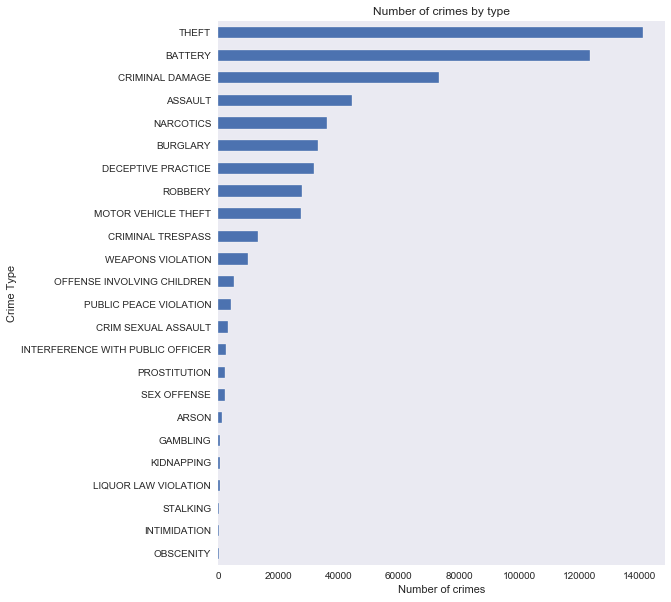

In [167]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [168]:
# Occurrence rates of the various types of crime
crimetypegb=crimes.groupby(["Primary Type"])["Primary Type"].count()/len(crimes)*100
crimetypegb.sort_values(ascending=False, inplace=True)
print(crimetypegb)

Primary Type
THEFT                               24.110753
BATTERY                             21.075169
CRIMINAL DAMAGE                     12.501259
ASSAULT                              7.596298
NARCOTICS                            6.189443
BURGLARY                             5.675377
DECEPTIVE PRACTICE                   5.426366
ROBBERY                              4.766887
MOTOR VEHICLE THEFT                  4.686671
CRIMINAL TRESPASS                    2.269775
WEAPONS VIOLATION                    1.666448
OFFENSE INVOLVING CHILDREN           0.913611
PUBLIC PEACE VIOLATION               0.721945
CRIM SEXUAL ASSAULT                  0.567487
INTERFERENCE WITH PUBLIC OFFICER     0.465254
PROSTITUTION                         0.407396
SEX OFFENSE                          0.360802
ARSON                                0.194737
GAMBLING                             0.107865
KIDNAPPING                           0.079533
LIQUOR LAW VIOLATION                 0.076120
STALKING             

Text(0, 0.5, 'Occurrence rate (%)')

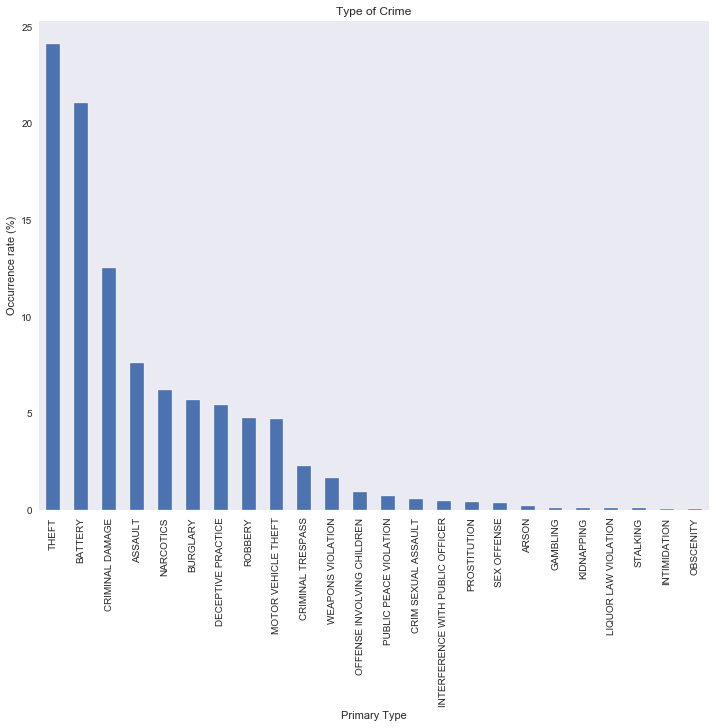

In [169]:
crimetypegb.plot(kind='bar',title="Type of Crime")
plt.ylabel('Occurrence rate (%)')

In [170]:
crimes.head()
print(crimes.columns.values)

['ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Description' 'Arrest'
 'Domestic' 'Beat' 'Ward' 'Community Area' 'FBI Code' 'X Coordinate'
 'Y Coordinate' 'Year' 'Updated On' 'Latitude' 'Longitude' 'Location'
 'Zip' 'City' 'State' 'Timezone' 'Daylight savings time flag' 'geopoint'
 'severe' 'Primary Type_ARSON' 'Primary Type_ASSAULT'
 'Primary Type_BATTERY' 'Primary Type_BURGLARY'
 'Primary Type_CRIM SEXUAL ASSAULT' 'Primary Type_CRIMINAL DAMAGE'
 'Primary Type_CRIMINAL TRESPASS' 'Primary Type_DECEPTIVE PRACTICE'
 'Primary Type_GAMBLING' 'Primary Type_INTERFERENCE WITH PUBLIC OFFICER'
 'Primary Type_INTIMIDATION' 'Primary Type_KIDNAPPING'
 'Primary Type_LIQUOR LAW VIOLATION' 'Primary Type_MOTOR VEHICLE THEFT'
 'Primary Type_NARCOTICS' 'Primary Type_OBSCENITY'
 'Primary Type_OFFENSE INVOLVING CHILDREN' 'Primary Type_PROSTITUTION'
 'Primary Type_PUBLIC PEACE VIOLATION' 'Primary Type_ROBBERY'
 'Primary Type_SEX OFFENSE' 'Primary Type_STALKING' 'Primary Type_THEFT'
 'Primary Type_WEAPONS VIOLAT

In [171]:
locationgb=crimes.groupby(['Location_Description'])["Location_Description"].count()/len(crimes)*100
locationgb.sort_values(ascending=False, inplace=True)
print(locationgb)

Location_Description
STREET                            26.142099
RESIDENCE                         17.130242
APARTMENT                         14.233927
SIDEWALK                          10.865532
PARKING LOT/GARAGE(NON.RESID.)     3.547431
SMALL RETAIL STORE                 2.659762
RESTAURANT                         2.572549
RESIDENTIAL YARD (FRONT/BACK)      2.514861
ALLEY                              2.419626
RESIDENCE-GARAGE                   2.211405
RESIDENCE PORCH/HALLWAY            2.065310
VEHICLE NON-COMMERCIAL             1.979291
DEPARTMENT STORE                   1.912728
SCHOOL, PUBLIC, BUILDING           1.568994
GAS STATION                        1.457715
GROCERY FOOD STORE                 1.427677
PARK PROPERTY                      0.969762
BAR OR TAVERN                      0.814279
CONVENIENCE STORE                  0.692931
COMMERCIAL / BUSINESS OFFICE       0.630465
CTA TRAIN                          0.618347
HOTEL/MOTEL                        0.574484
DRUG STORE 

Text(0, 0.5, 'Occurrence rate (%)')

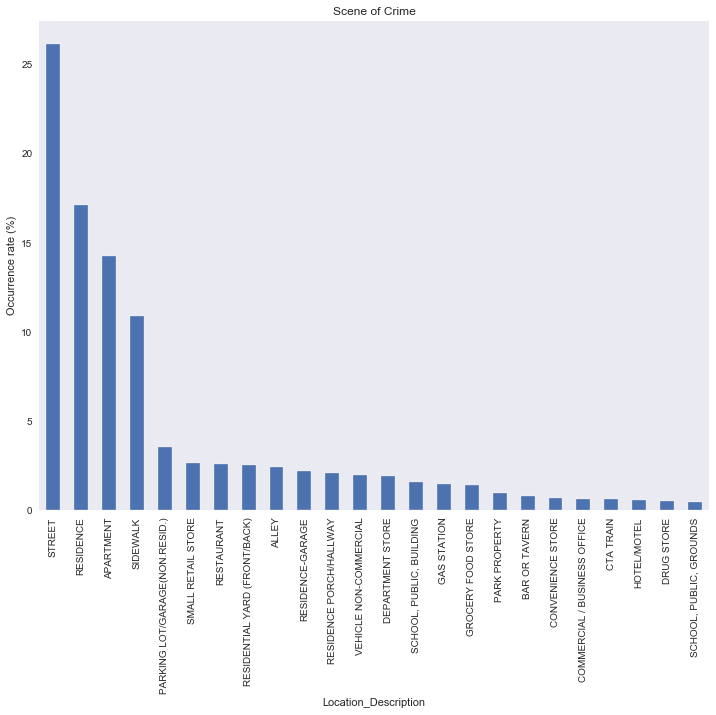

In [172]:
locationgb.plot(kind='bar',title="Scene of Crime")
plt.ylabel('Occurrence rate (%)')

In [173]:
from datetime import datetime
format = '%m/%d/%Y %H:%M'
crimes["time_hour"]=crimes.Date.apply(lambda row: datetime.strptime(row, format).strftime("%H"))
crimes["month"]=crimes.Date.apply(lambda row: datetime.strptime(row, format).strftime("%m"))

In [174]:
timegb=crimes.groupby(['time_hour'])["time_hour"].count()/len(crimes)*100
print(timegb)

time_hour
00    4.848980
01    3.203355
02    2.771553
03    2.312444
04    1.792745
05    1.542710
06    1.725842
07    2.389929
08    3.374710
09    4.238996
10    4.144102
11    4.354371
12    5.578947
13    4.693498
14    4.888406
15    5.264398
16    5.208076
17    5.310479
18    5.888206
19    5.818060
20    5.595502
21    5.328741
22    5.297167
23    4.428784
Name: time_hour, dtype: float64


Text(0, 0.5, 'Occurrence rate (%)')

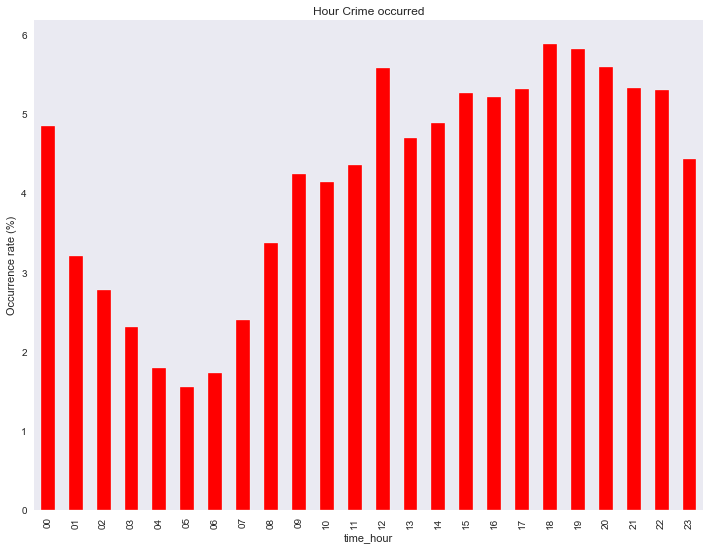

In [175]:
timegb.plot(kind='bar',title="Hour Crime occurred", color = 'red')
plt.ylabel('Occurrence rate (%)')

In [176]:
weekday=crimes[["Weekday_Monday","Weekday_Tuesday","Weekday_Wednesday","Weekday_Thursday","Weekday_Friday","Weekday_Saturday","Weekday_Sunday"]].sum()/len(crimes)*100
print(weekday)

Weekday_Monday       14.122137
Weekday_Tuesday      13.886438
Weekday_Wednesday    13.919548
Weekday_Thursday     14.073836
Weekday_Friday       14.879582
Weekday_Saturday     14.669996
Weekday_Sunday       14.448463
dtype: float64


Text(0, 0.5, 'Occurrence rate (%)')

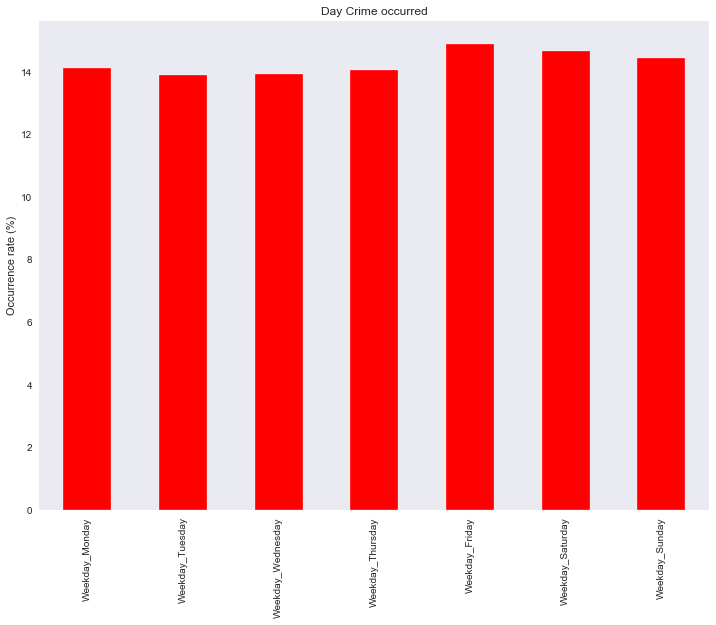

In [177]:
weekday.plot(kind='bar',title="Day Crime occurred",color='red')
plt.ylabel('Occurrence rate (%)')

In [178]:
month_group=crimes.groupby(['month'])['month'].count()/len(crimes)*100
print(month_group)

month
01     5.965521
02     5.309284
03     7.273385
04     8.908088
05     9.778518
06     9.860612
07    10.298046
08    10.356586
09     9.678333
10     9.561423
11     7.283967
12     5.726238
Name: month, dtype: float64


Text(0, 0.5, 'Occurrence rate (%)')

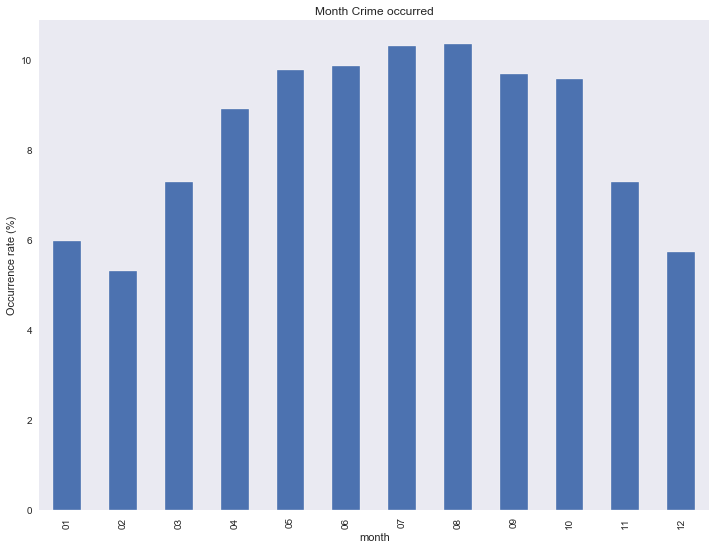

In [179]:
month_group.plot(kind='bar',title="Month Crime occurred")
plt.ylabel('Occurrence rate (%)')

In [180]:
def topfour(row):
    keep = ["THEFT", "BATTERY", "NARCOTICS", "CRIMINAL DAMAGE"]
    if row not in keep:
        return "OTHERS"
    else:
        return row

In [181]:
crimes["New_Type"] = crimes["Primary Type"].apply(topfour)

In [182]:
# Here we write a function to take in a column name, title, and return a plot that displays the percentage, per column
# with the normalized types of crimes for each feature in the selected column
def plotsplit(cnam, title):
    datasplit = crimes.groupby([cnam, "New_Type"])[cnam].count().unstack()
    # Convert everything to percentage for normalization, so we can compare!
    datasplit= datasplit.apply(lambda c: c / c.sum() * 100, axis=1)
    # Reorder columns
    datasplit = datasplit[['OTHERS', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BATTERY', 'THEFT']]
    datasplit.plot(kind = "bar", stacked = True, title = title)
    plt.ylabel('Fraction of Crime Type (%)')
    # Anchoring legend from http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True, shadow=True)
    plt.ylim([0,120])

In [183]:
import matplotlib.pyplot as pltd

pltd.rcParams["figure.figsize"] = (12,9)

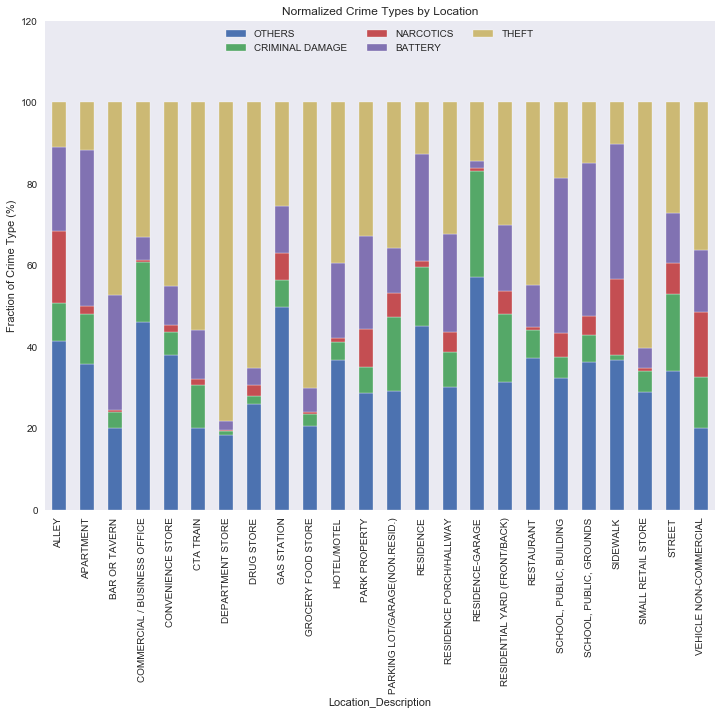

In [184]:
plotsplit("Location_Description", "Normalized Crime Types by Location")

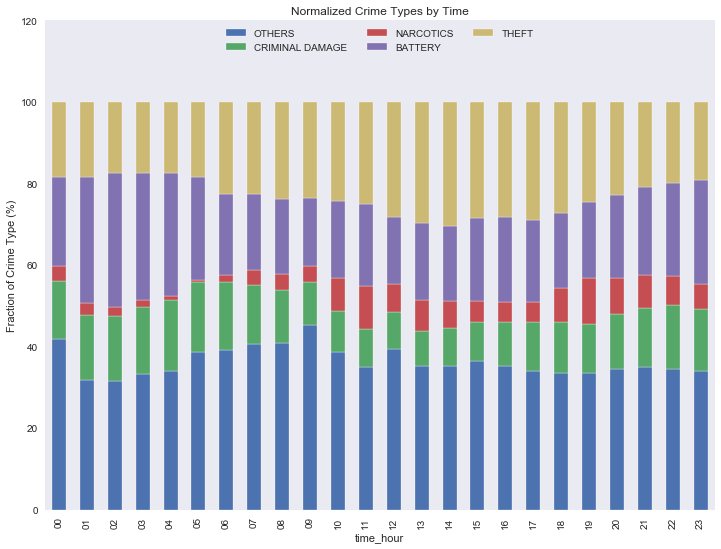

In [185]:
plotsplit("time_hour", "Normalized Crime Types by Time")

In [186]:
# Writing a function to turn Mon, Tue, Wed, Thur, Fri, Sat, Sun into 1 - 7
crimes["Weekday_Tuesday"] = (crimes["Weekday_Tuesday"].apply(lambda x: x+1 if x > 0 else 0))
crimes["Weekday_Wednesday"] = (crimes["Weekday_Wednesday"].apply(lambda x: x+2 if x > 0 else 0))
crimes["Weekday_Thursday"] = (crimes["Weekday_Thursday"].apply(lambda x: x+3 if x > 0 else 0))
crimes["Weekday_Friday"] = (crimes["Weekday_Friday"].apply(lambda x: x+4 if x > 0 else 0))
crimes["Weekday_Saturday"] = (crimes["Weekday_Saturday"].apply(lambda x: x+5 if x > 0 else 0))
crimes["Weekday_Sunday"] = (crimes["Weekday_Sunday"].apply(lambda x: x+6 if x > 0 else 0))

In [187]:
crimes["Num_Day"] = crimes["Weekday_Monday"] + crimes["Weekday_Tuesday"] + crimes["Weekday_Wednesday"] + crimes["Weekday_Thursday"] + crimes["Weekday_Friday"] + crimes["Weekday_Saturday"] + crimes["Weekday_Sunday"]
crimes["Num_Day"] = crimes["Num_Day"].astype(int)

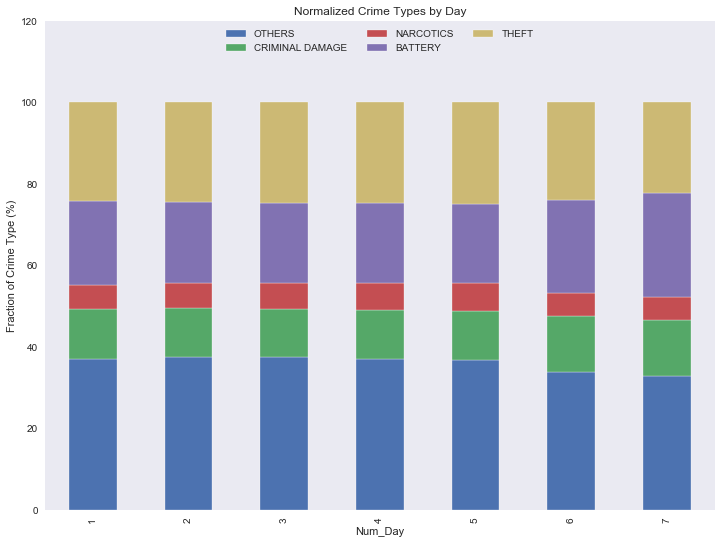

In [188]:
plotsplit("Num_Day", "Normalized Crime Types by Day")

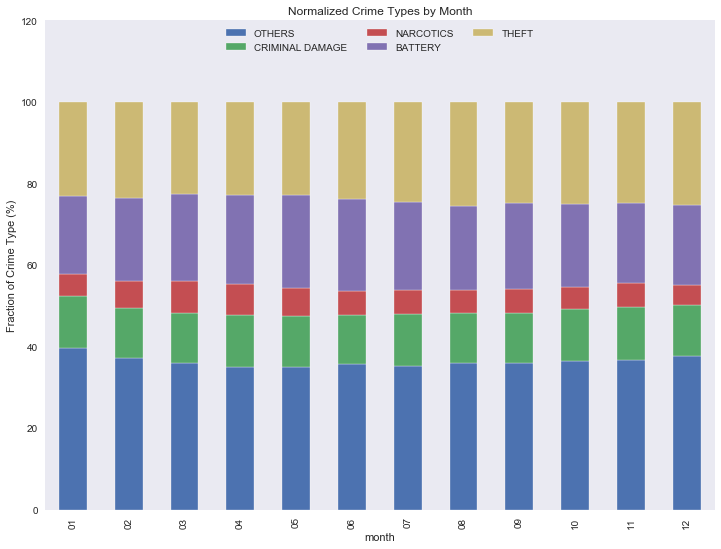

In [189]:
plotsplit("month", "Normalized Crime Types by Month")

In [190]:
# convert dates to pandas datetime format

crimes['Date'] = pd.to_datetime(crimes['Date'])

# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [191]:
crimes["jdate"] = crimes['Date'].dt.date

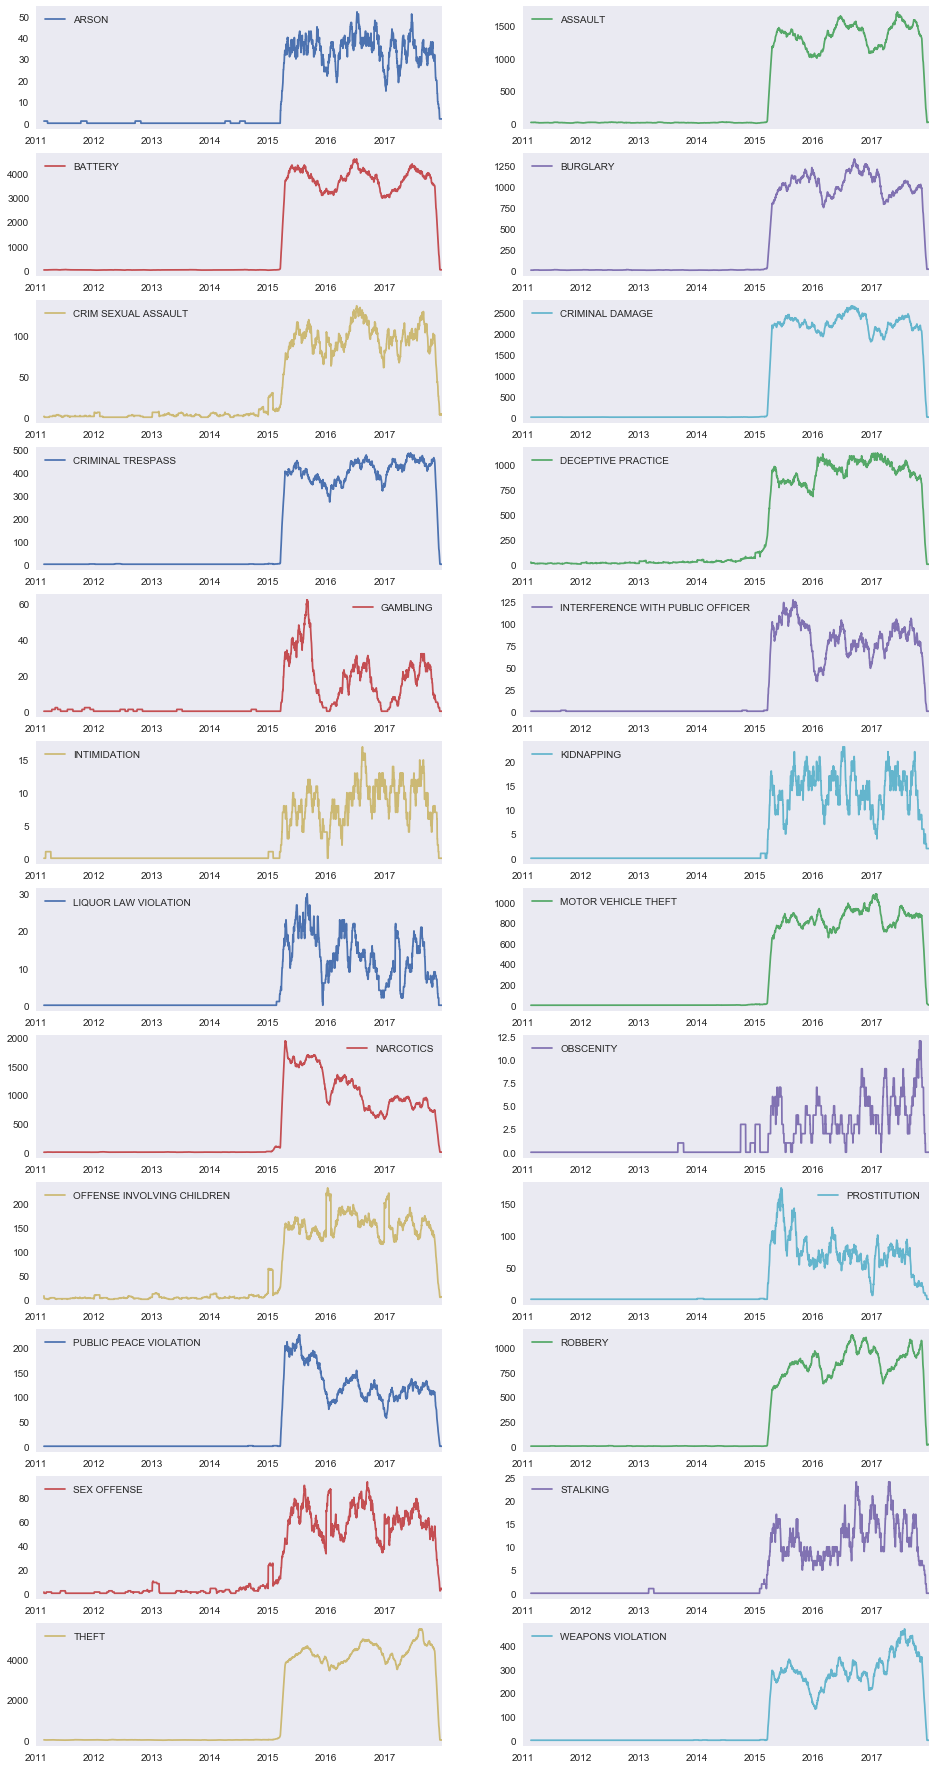

In [192]:
#crime rates by its type
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value = 0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(30).sum().plot(figsize=(16, 32), subplots=True, layout=(-1, 2), sharex=False, sharey=False)

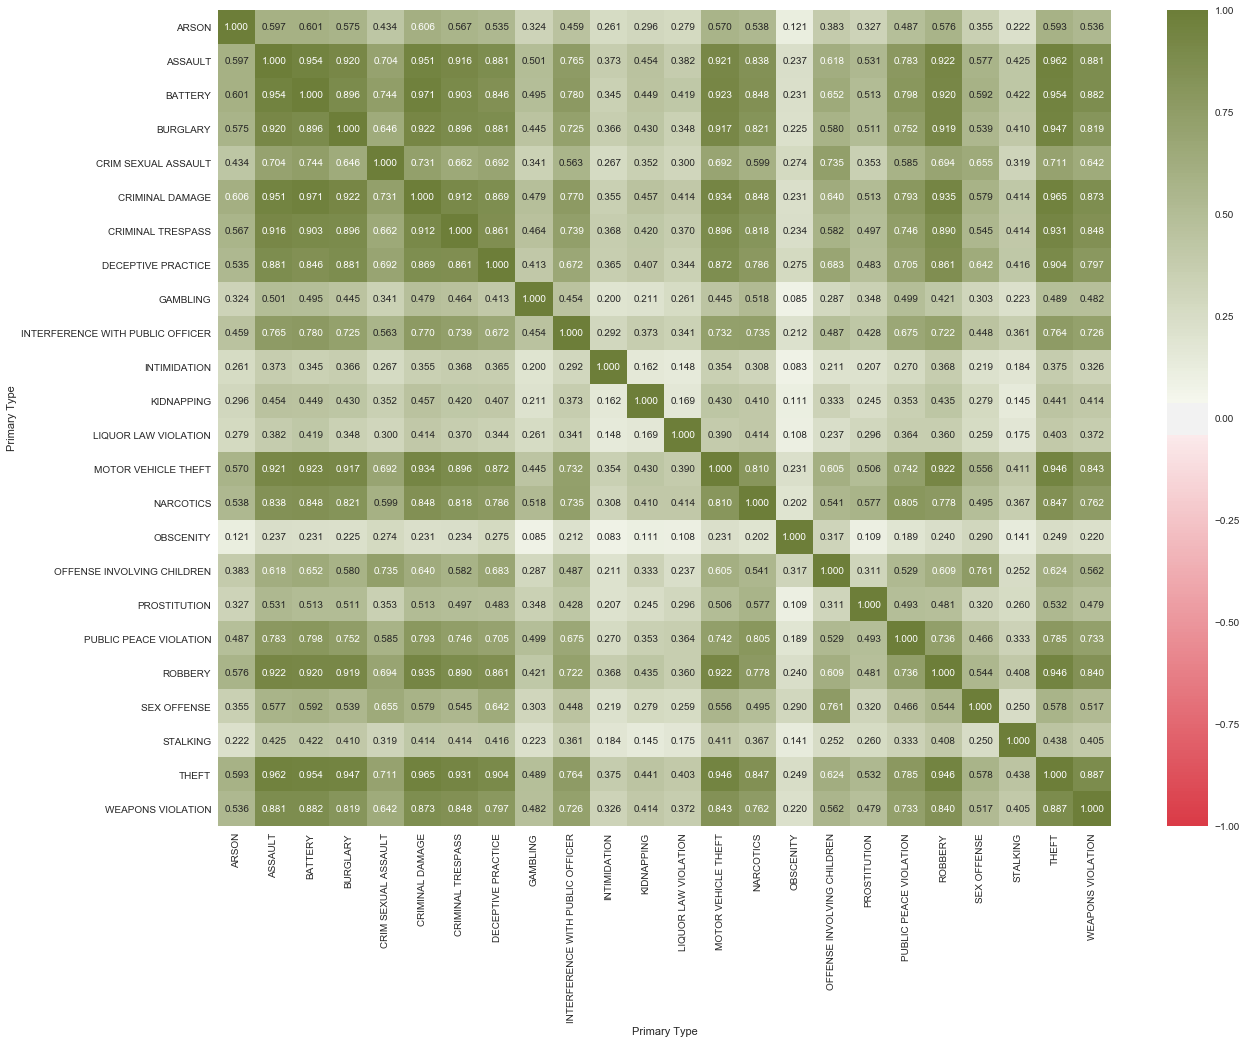

In [193]:
#crime types correlation based on arrest or domestic (to note seriousness of crime)
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
sns.set_style('dark')
cmap = sns.diverging_palette(10, 100, as_cmap=True)
plt.figure(figsize=(20,15))
sns.heatmap(crimes_count_date.corr(), cmap=cmap, annot = True, vmin = -1, vmax = 1, fmt = '.3f')

In [194]:
hour_by_location = crimes.pivot_table(values='ID', index='Location_Description', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_week     = crimes.pivot_table(values='ID', index=crimes.index.hour, columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
hour_by_week     = hour_by_week[days].T # just reorder columns according to the the order of days
dayofweek_by_location = crimes.pivot_table(values='ID', index='Location_Description', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = crimes.pivot_table(values='ID', index='Location_Description', columns='Primary Type', aggfunc=np.size).fillna(0)

In [195]:
print(hour_by_location.head(5))
print(hour_by_type.head(5))
print(hour_by_week.head(5))
print(dayofweek_by_location.head(5))
print(dayofweek_by_type.head(5))
print(location_by_type.head(5))

Date                            0     1     2     3     4     5     6     7   \
Location_Description                                                           
ALLEY                          659   479   407   338   239   193   200   276   
APARTMENT                     4669  3103  2791  2344  2002  1830  2096  2873   
BAR OR TAVERN                  674   814   699   438   153    36     7     7   
COMMERCIAL / BUSINESS OFFICE   152    60    54    76    62    55    41    69   
CONVENIENCE STORE              161   147   126   104    94    61    29    52   

Date                            8     9   ...    14    15    16    17    18  \
Location_Description                      ...                                 
ALLEY                          354   414  ...   621   716   782   694   895   
APARTMENT                     3904  4623  ...  3574  3551  3549  3596  3833   
BAR OR TAVERN                    8    19  ...    46    48    77   107   129   
COMMERCIAL / BUSINESS OFFICE   156   221  ..

In [196]:
def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

C:\Users\puj83\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


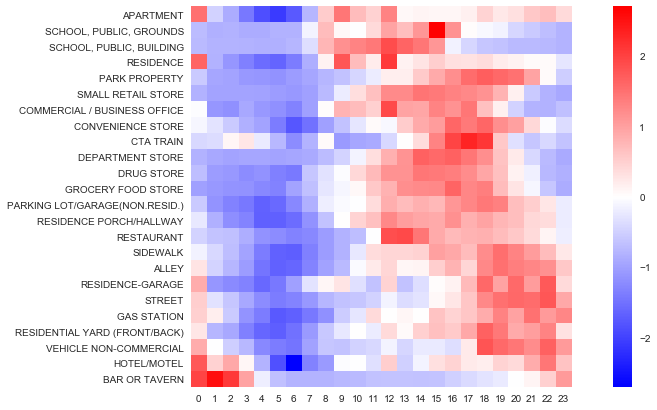

In [197]:
plt.figure(figsize=(15,7))
scale_and_plot(hour_by_location)

C:\Users\puj83\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


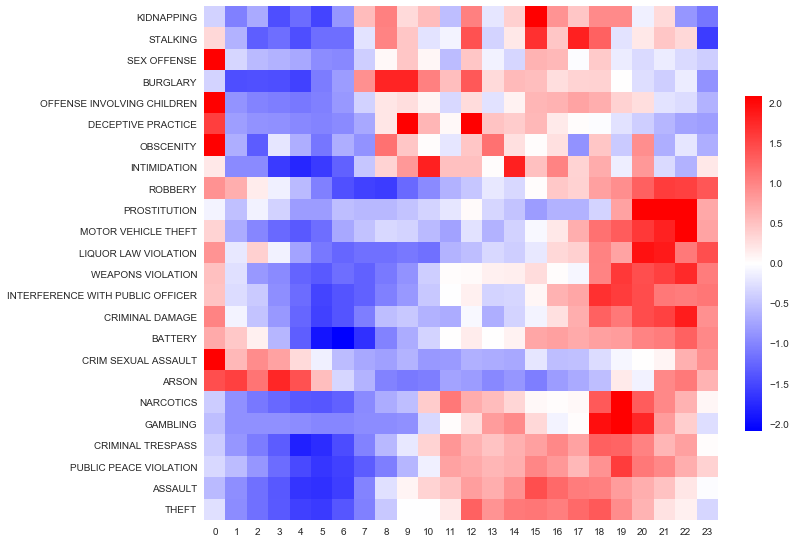

In [198]:
plt.figure(figsize=(10,12))
scale_and_plot(hour_by_type)

C:\Users\puj83\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


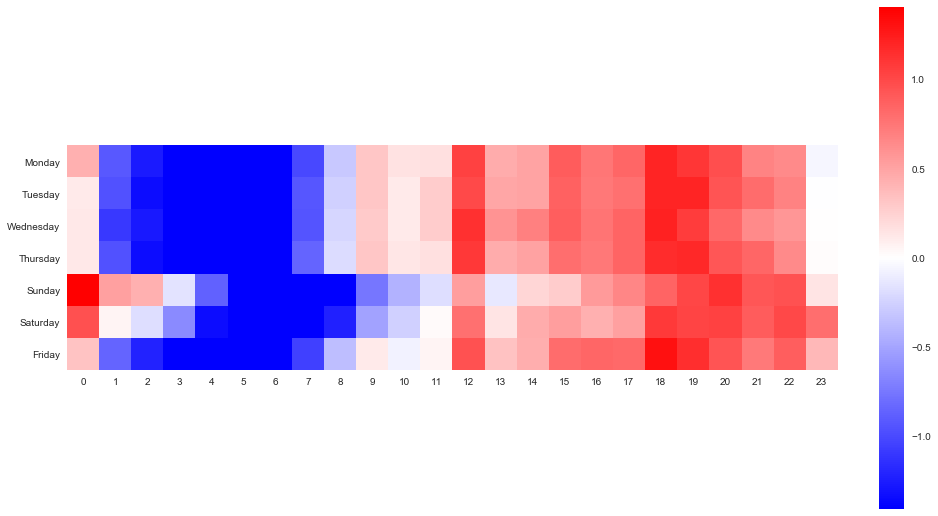

In [199]:
plt.figure(figsize=(15,15))
scale_and_plot(hour_by_week)

C:\Users\puj83\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


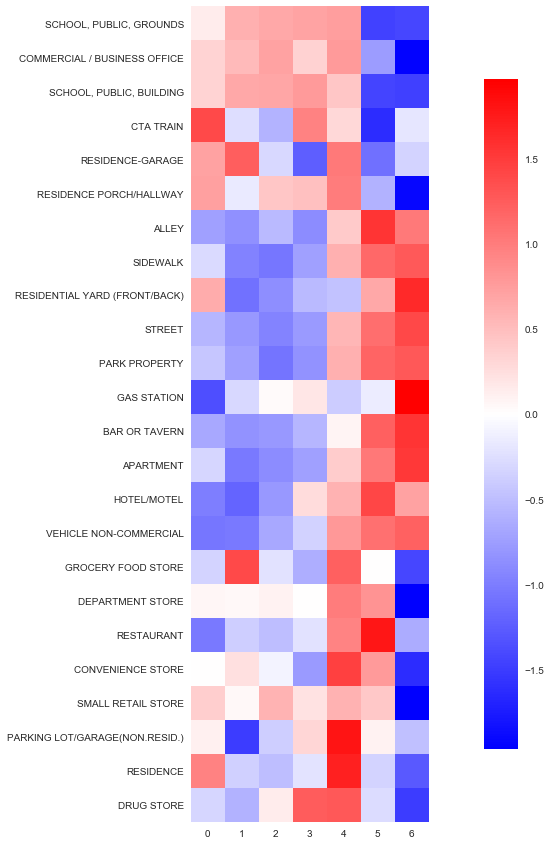

In [200]:
plt.figure(figsize=(20,15))
scale_and_plot(dayofweek_by_location)

C:\Users\puj83\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


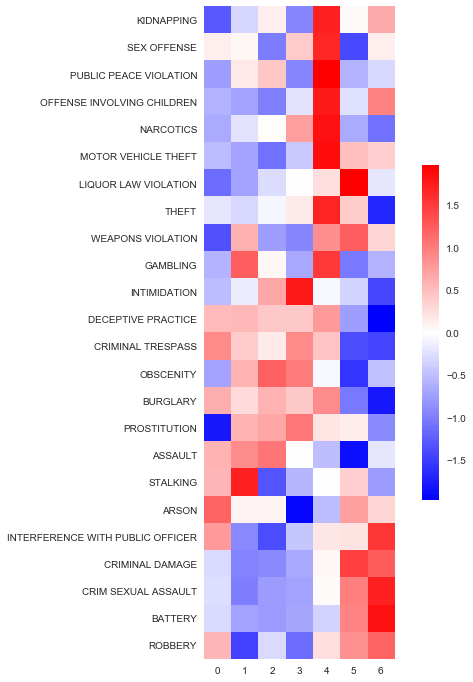

In [201]:
plt.figure(figsize=(10,12))
scale_and_plot(dayofweek_by_type)

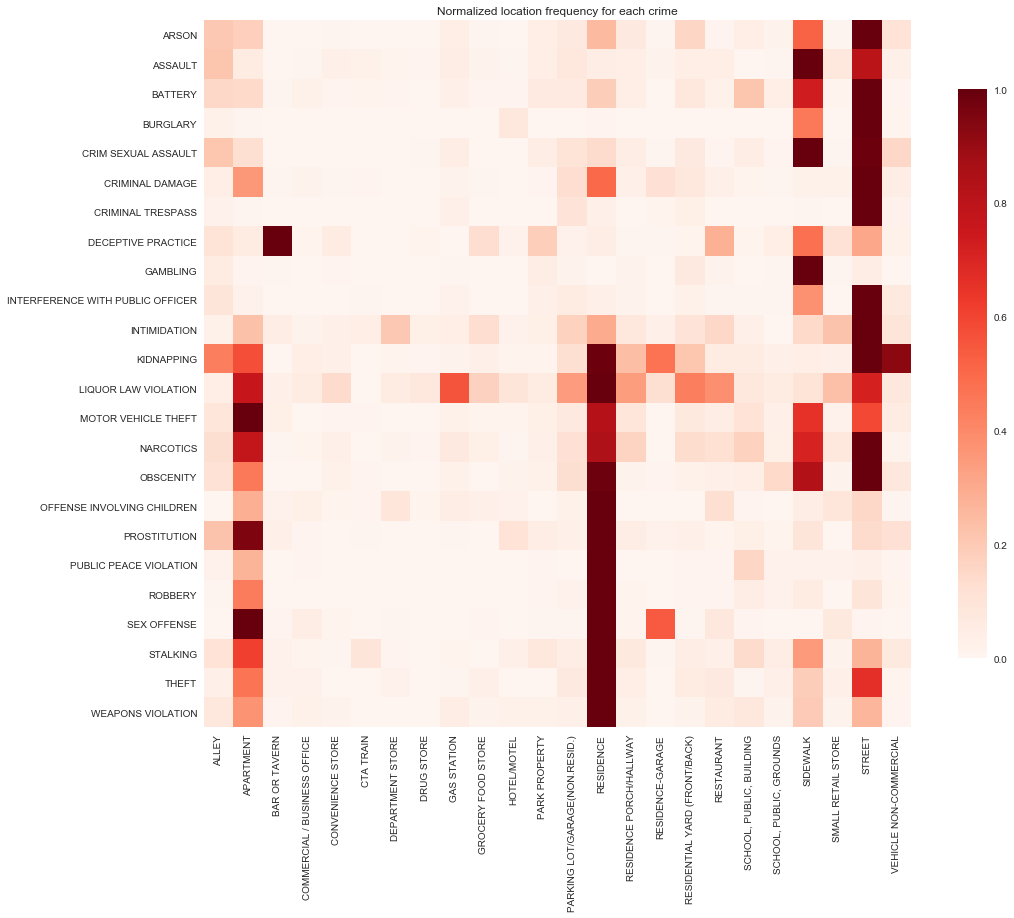

In [202]:
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

In [351]:
crimes.to_csv('C:/Users/puj83/OneDrive/CV/Cases/Country Financial/Crimes_Final_Cleansed_Dataset.csv', index=False)

In [394]:
data=crimes.sample(100000)

In [395]:
data.loc[:, data.dtypes == np.object]

,Case Number,Block,IUCR,Description,FBI Code,Updated On,Location,City,State,geopoint,District,Primary Type,time_24hour,Date_no_time,Location_Description,time_hour,month,New_Type,jdate
Date,,,,,,,,,,,,,,,,,,,
2016-03-04 07:30:00,HZ173902,059XX W FILLMORE ST,910,AUTOMOBILE,7,2/10/2018 15:50,"(41.867317326, -87.772188619)",Maywood,IL,"41.880281, -87.84455",D15,MOTOR VEHICLE THEFT,07:30,20160304,SIDEWALK,07,03,OTHERS,2016-03-04
2017-10-31 20:00:00,JA507044,044XX N SPRINGFIELD AVE,910,AUTOMOBILE,7,2/10/2018 15:50,"(41.961445072, -87.725392918)",Skokie,IL,"42.03618, -87.7321",D17,MOTOR VEHICLE THEFT,20:00,20171031,STREET,20,10,OTHERS,2017-10-31
2017-05-27 16:25:00,JA281562,021XX W POLK ST,820,$500 AND UNDER,6,2/10/2018 15:50,"(41.871409249, -87.680825512)",Chicago,IL,"41.901485, -87.74055",D12,THEFT,16:25,20170527,STREET,16,05,THEFT,2017-05-27
2016-02-29 09:30:00,HZ168998,015XX N HALSTED ST,820,$500 AND UNDER,6,2/10/2018 15:50,"(41.909970949, -87.648250434)",Chicago,IL,"41.888627, -87.63538",D18,THEFT,09:30,20160229,STREET,09,02,THEFT,2016-02-29
2015-03-26 09:00:00,HY202508,0000X E RANDOLPH ST,1320,TO VEHICLE,14,2/10/2018 15:50,"(41.884494554, -87.627138636)",Chicago,IL,"41.888627, -87.63538",D1,CRIMINAL DAMAGE,09:00,20150326,PARKING LOT/GARAGE(NON.RESID.),09,03,CRIMINAL DAMAGE,2015-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27 12:00:00,JA265081,020XX W DIVISION ST,1154,FINANCIAL IDENTITY THEFT $300 AND UNDER,11,2/10/2018 15:50,"(41.903168666, -87.678467174)",Chicago,IL,"41.901485, -87.74055",D12,DECEPTIVE PRACTICE,12:00,20170327,RESIDENCE,12,03,OTHERS,2017-03-27
2016-05-07 09:00:00,HZ255672,059XX S KEELER AVE,620,UNLAWFUL ENTRY,5,2/10/2018 15:50,"(41.785282477, -87.72783368)",Chicago,IL,"41.811929, -87.68732",D8,BURGLARY,09:00,20160507,RESIDENCE-GARAGE,09,05,OTHERS,2016-05-07
2016-02-26 00:45:00,HZ165705,004XX N CLARK ST,870,POCKET-PICKING,6,2/10/2018 15:50,"(41.889751946, -87.631072891)",Chicago,IL,"41.888627, -87.63538",D18,THEFT,00:45,20160226,BAR OR TAVERN,00,02,THEFT,2016-02-26


In [396]:
data=data.drop(["ID","Case Number", "Updated On", "Date","Block","IUCR","Description","Ward","Community Area","FBI Code",
               "X Coordinate","Y Coordinate","Year","Location","District","Primary Type","time_24hour","Date_no_time",
               "City", "State", "geopoint", "Location_Description", "time_hour", "month", "New_Type", "jdate"], axis=1)

In [397]:
data.columns.values

array(['Arrest', 'Domestic', 'Beat', 'Latitude', 'Longitude', 'Zip',
       'Timezone', 'Daylight savings time flag', 'severe',
       'Primary Type_ARSON', 'Primary Type_ASSAULT',
       'Primary Type_BATTERY', 'Primary Type_BURGLARY',
       'Primary Type_CRIM SEXUAL ASSAULT', 'Primary Type_CRIMINAL DAMAGE',
       'Primary Type_CRIMINAL TRESPASS',
       'Primary Type_DECEPTIVE PRACTICE', 'Primary Type_GAMBLING',
       'Primary Type_INTERFERENCE WITH PUBLIC OFFICER',
       'Primary Type_INTIMIDATION', 'Primary Type_KIDNAPPING',
       'Primary Type_LIQUOR LAW VIOLATION',
       'Primary Type_MOTOR VEHICLE THEFT', 'Primary Type_NARCOTICS',
       'Primary Type_OBSCENITY',
       'Primary Type_OFFENSE INVOLVING CHILDREN',
       'Primary Type_PROSTITUTION', 'Primary Type_PUBLIC PEACE VIOLATION',
       'Primary Type_ROBBERY', 'Primary Type_SEX OFFENSE',
       'Primary Type_STALKING', 'Primary Type_THEFT',
       'Primary Type_WEAPONS VIOLATION', 'District_D1', 'District_D10',
     

In [398]:
data.loc[:, data.dtypes == np.object]

""
Date
2016-03-04 07:30:00
2017-10-31 20:00:00
2017-05-27 16:25:00
2016-02-29 09:30:00
2015-03-26 09:00:00
...
2017-03-27 12:00:00
2016-05-07 09:00:00
2016-02-26 00:45:00


In [399]:
a=list(data.columns.values)
droplist=[]
for i in a:
    if i.startswith("Primary Type"):
        droplist.append(i)
data=data.drop(droplist, axis=1)

In [400]:
from sklearn.model_selection import train_test_split

In [401]:
itrain, itest = train_test_split(range(data.shape[0]), train_size=0.7)

In [402]:
mask=np.ones(data.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)

In [403]:
data.shape

(100000, 76)

In [404]:
data=data.dropna()

In [405]:
np.nan_to_num(data)

array([[False, False, 1513, ..., 0, 0, 5],
       [False, False, 1723, ..., 1, 0, 2],
       [False, False, 1225, ..., 1, 0, 6],
       ...,
       [False, False, 1831, ..., 0, 0, 5],
       [False, True, 611, ..., 0, 0, 6],
       [False, False, 822, ..., 0, 0, 7]], dtype=object)

In [406]:
#We have a list of continuous features, or in other words standardizable variables
STANDARDIZABLE=["Latitude", "Longitude", "House_below_poverty","Unemployed","Under18_over64","Income","HARDSHIP INDEX"]

#Also create a list for indicator variable. We can do this by excluding the above continuous features from total features. 
INDICATOR=list(data.columns)
#We need to remove the response variable from our total list of features
INDICATOR.remove(u'severe')

In [407]:
print (len(STANDARDIZABLE), len(INDICATOR))

7 75


In [408]:
from sklearn.preprocessing import StandardScaler
#Standardize training set
data.loc[mask,STANDARDIZABLE]=StandardScaler().fit_transform(data.loc[mask,STANDARDIZABLE])
#Standardize test set
data.loc[~mask,STANDARDIZABLE]=StandardScaler().fit_transform(data.loc[~mask,STANDARDIZABLE])

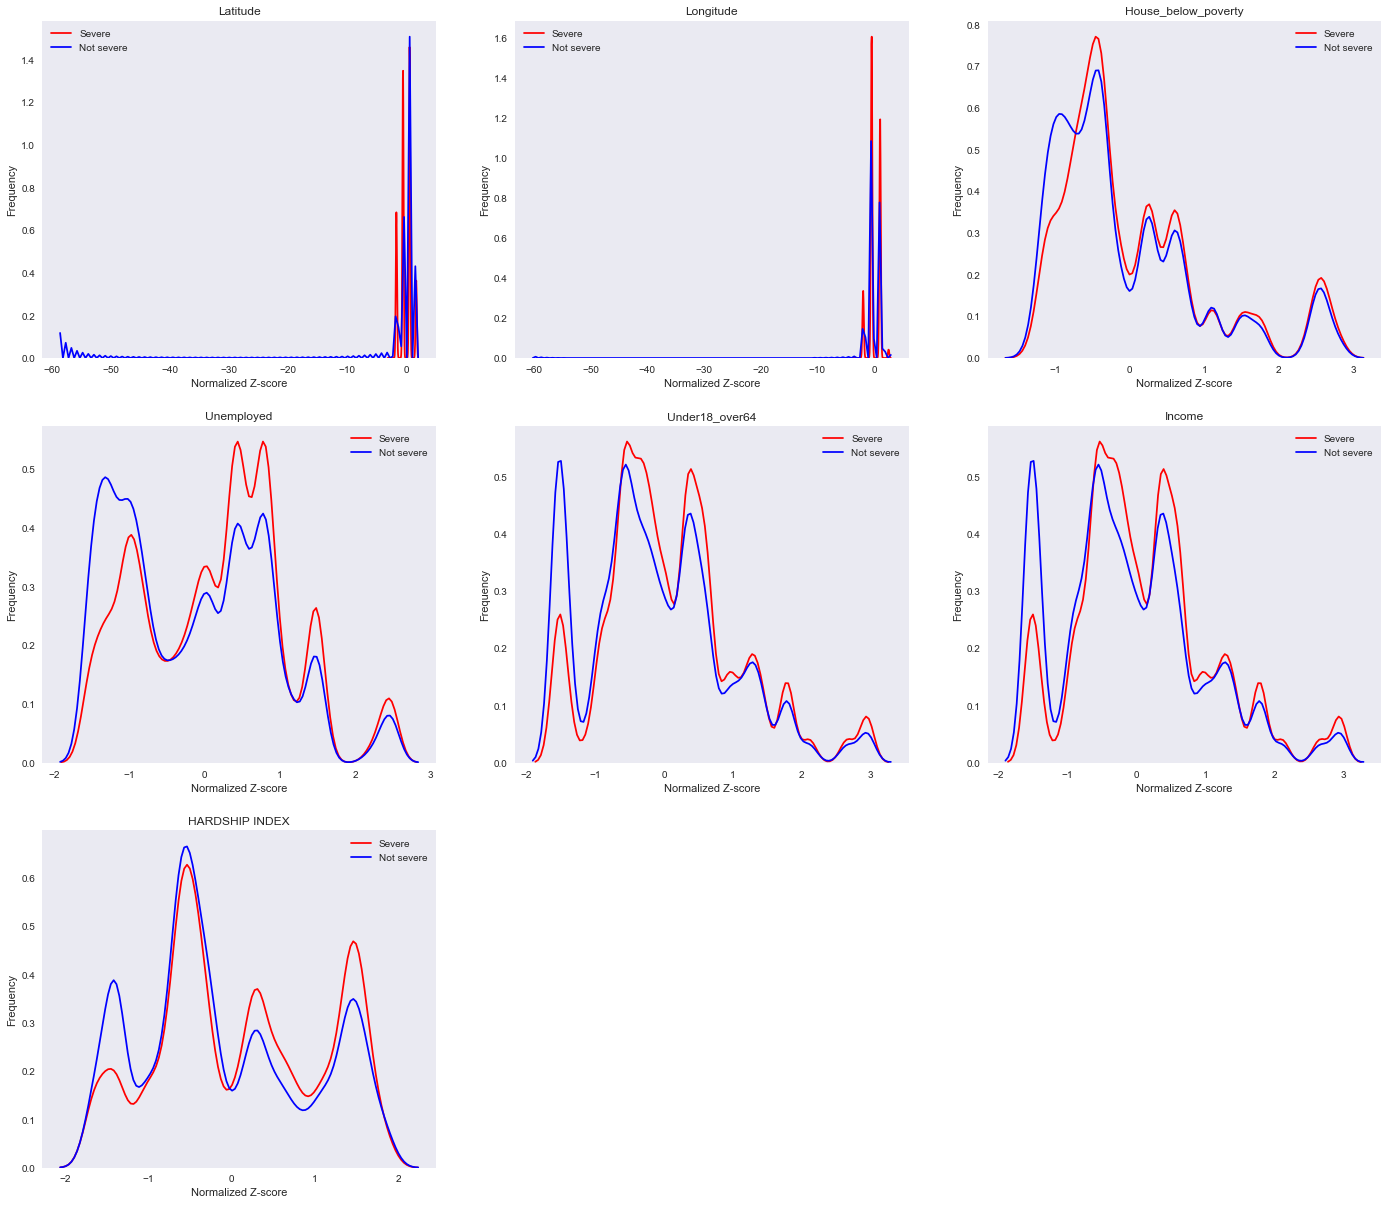

In [409]:
fig=plt.figure(figsize=(24,36))
pos=data[data["severe"]==1]
neg=data[data["severe"]==0]
for k in range (7):
    ax=fig.add_subplot(5,3,k+1)    
    sns.kdeplot(pos[STANDARDIZABLE[k]],color="red",label="Severe")
    sns.kdeplot(neg[STANDARDIZABLE[k]],color="blue",label="Not severe")
    ax.set_title(STANDARDIZABLE[k])
    ax.set_xlabel("Normalized Z-score")
    ax.set_ylabel("Frequency")

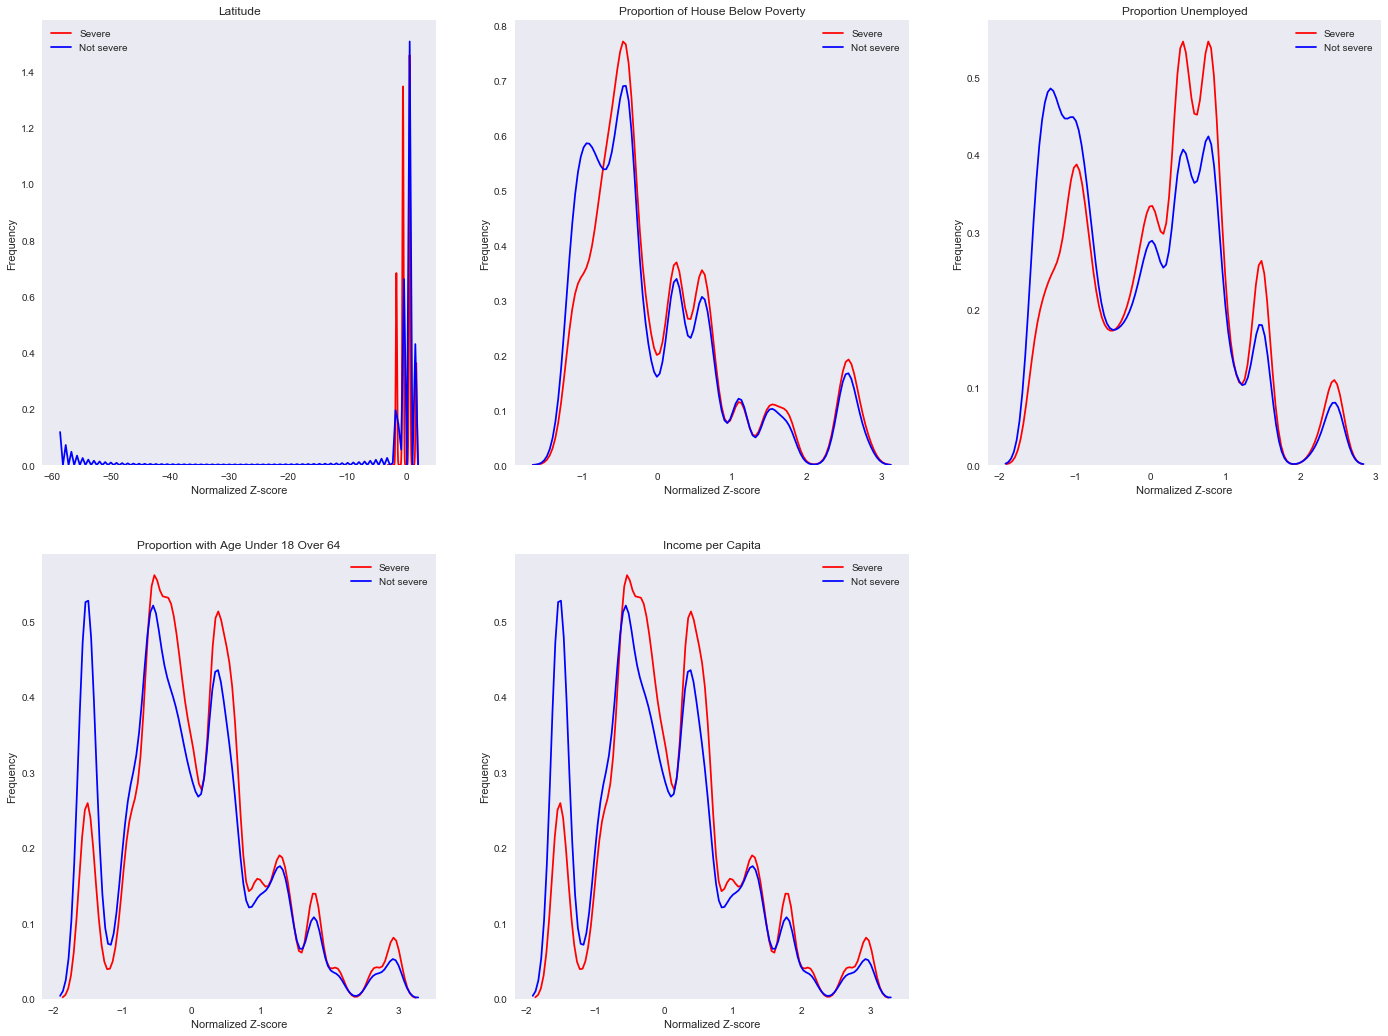

In [410]:
#The following command just plot those continuous features with significant effects (for presentation purpose)
plotlist=["Latitude","House_below_poverty","Unemployed","Under18_over64","Income"]
plotlist_title=["Latitude","Proportion of House Below Poverty","Proportion Unemployed", "Proportion with Age Under 18 Over 64", "Income per Capita"]
fig=plt.figure(figsize=(24,18))
for k in range (5):
    ax=fig.add_subplot(2,3,k+1)    
    sns.kdeplot(pos[plotlist[k]],color="red",label="Severe")
    sns.kdeplot(neg[plotlist[k]],color="blue",label="Not severe")
    ax.set_title(plotlist_title[k])
    ax.set_xlabel("Normalized Z-score")
    ax.set_ylabel("Frequency")

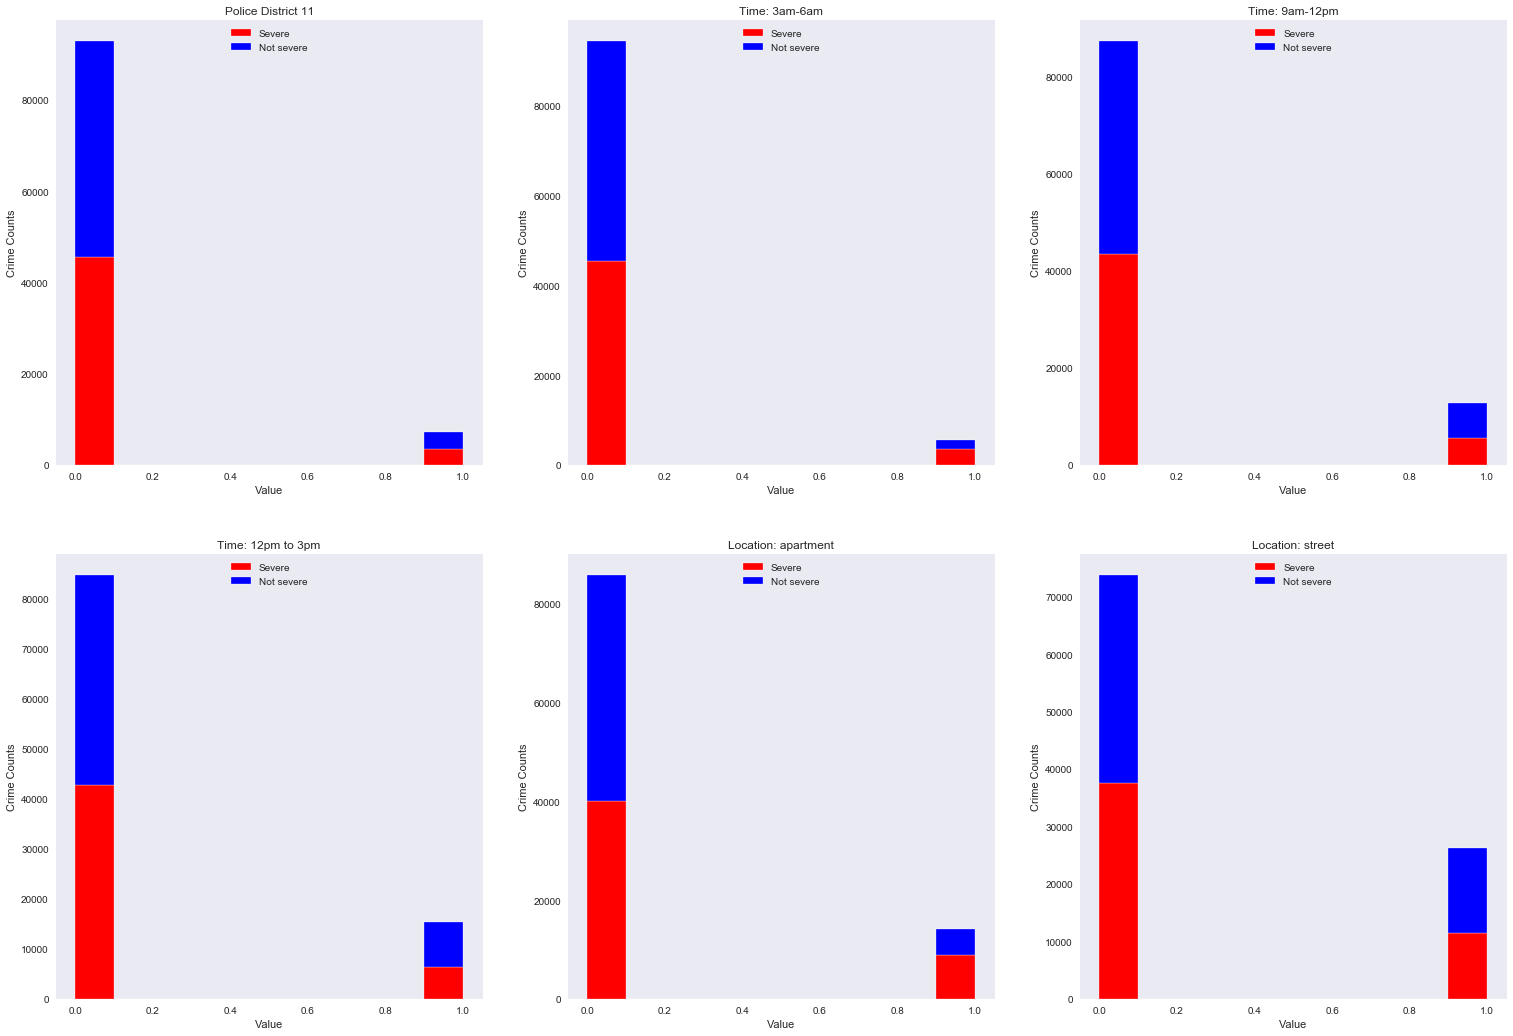

In [412]:
#This cell is to plot those indicator variables that will be good predictor for whether a crime will be severe or not.
fig=plt.figure(figsize=(26,18))
plotfeature=["District_D11","Timeblock_3","Timeblock_9","Timeblock_12","Location Description_APARTMENT","Location Description_STREET"]
plotfeature_title=["Police District 11","Time: 3am-6am","Time: 9am-12pm", "Time: 12pm to 3pm","Location: apartment","Location: street"]
for k in range (6):
    ax=fig.add_subplot(2,3,k+1)
    ax.hist((pos[plotfeature[k]],neg[plotfeature[k]]),stacked=True,color=("red","blue"),range=[0,1])
    ax.set_title(plotfeature_title[k])
    ax.legend(("Severe","Not severe"),loc="upper center")
    ax.set_xlabel("Value")
    ax.set_ylabel("Crime Counts")

In [413]:
pos=data[data['severe']==1]
neg=data[data['severe']==0]
percent_severe=float(len(pos))/len(data)
percent_non_severe=float(len(neg))/len(data)
print (percent_severe, percent_non_severe)

0.4904 0.5096


In [414]:
#Let's make a dictionary storing confusion matrix for all the algorithms, so that we can have some comparison
confusion_dict={}
confusion_dict["Baseline_model"]=np.asarray([[len(neg),0],[len(pos),0]])
#Also create a dictionary to store all the models
model_dict={}
#The following dict will store the accuracy for training set
accuracy_dict={}
#The following dict will store the accuracy for test set
accuracy_dict1={}
train_not_severe_percent=1-float(sum(data["severe"].values[mask]))/len(data["severe"].values[mask])
test_not_severe_percent=1-float(sum(data["severe"].values[~mask]))/len(data["severe"].values[~mask])
print (train_not_severe_percent, test_not_severe_percent) 
accuracy_dict["Baseline_model"]=train_not_severe_percent
accuracy_dict1["Baseline_model"]=test_not_severe_percent

0.5103285714285715 0.5079


In [415]:
#Got the X and y for traning set and test set
total_features=STANDARDIZABLE+INDICATOR

In [416]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Training accuracy: %0.2f" % (training_accuracy))
    print ("Test accuracy:     %0.2f" % (test_accuracy))
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, confmatrix, training_accuracy, test_accuracy

In [417]:
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best

In [418]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier()
clfrdf, Xtrain, ytrain, Xtest, ytest, confrdf, training_accuracy, test_accuracy=do_classify(randf, {"n_estimators":[10, 20, 30, 40, 100]}, data, total_features, u'severe',1, mask=mask)
confusion_dict["Random forest"]=confrdf
model_dict["Random forest"]=clfrdf
accuracy_dict["Random forest"]=training_accuracy
accuracy_dict1["Random forest"]=test_accuracy

Training accuracy: 0.95
Test accuracy:     0.67
[[10646  4591]
 [ 5349  9414]]
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


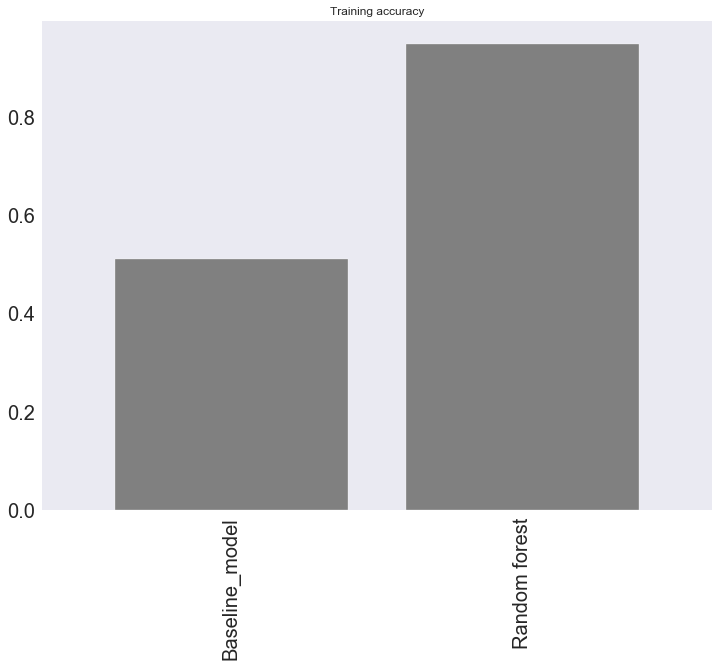

In [419]:
#Compare training and testing accuracy
pd.Series(accuracy_dict).plot(kind="bar",title="Training accuracy",width=0.8,color="grey", fontsize=20)

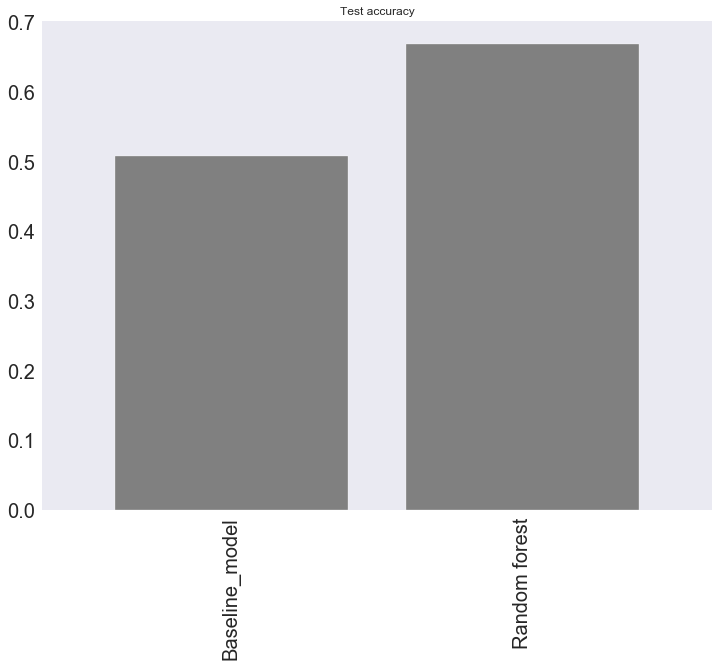

In [420]:
#Compare training and testing accuracy
pd.Series(accuracy_dict1).plot(kind="bar",title="Test accuracy",width=0.8, color="grey",fontsize=20)